In [1]:
import cconfigspace as ccs
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from collections import Counter

## Hyperparamters
CCS defines 4 types of hyperparameters NumericalHyperparameter, CategoricalHyperparameter, OrdinalHyperparameter, and DiscreteHyperparameter.
All hyper parameters constructors can take a `name` named parameter to define a name for the hyperparameter, or CCS will attribute one automatically. They also take a `default` name argument that must be a valid value for numerical hyperparameters and an index into the list of possible values for collection based hyperparameters, or ccs will use the lower or the first value respectively.
### Numerical Hyperparameters
This creates a float numerical hyperparameter. By default they are associated a uniform distribution sampled between [lower, upper):

In [2]:
hflt = ccs.NumericalHyperparameter.float(name = 'hflt', lower = -2.0, upper = 1.5)
hflt_uniform_samples = hflt.samples(1000)
assert min(hflt_uniform_samples) >= hflt.lower
assert max(hflt_uniform_samples) < hflt.upper

To sample using another distribution:

In [3]:
fnrm_distrib = ccs.NormalDistribution.float(mu = 0.0, sigma = 1.0)
hflt_normal_samples = hflt.samples(1000, distribution = fnrm_distrib)
assert min(hflt_normal_samples) >= hflt.lower
assert max(hflt_normal_samples) < hflt.upper

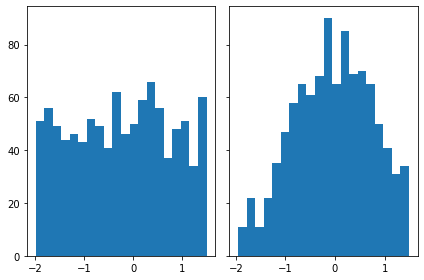

In [4]:
n_bins = 20
fig1, axs1 = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs1[0].hist(hflt_uniform_samples, bins=n_bins);
axs1[1].hist(hflt_normal_samples, bins=n_bins);

The same works for integer hyperparameters:

In [5]:
hint = ccs.NumericalHyperparameter.int(name = 'hint', lower = -7, upper = 13)
hint_uniform_samples = hint.samples(1000)
assert min(hint_uniform_samples) >= hint.lower
assert max(hint_uniform_samples) < hint.upper
inrm_distrib = ccs.NormalDistribution.int(mu = 3.0, sigma = 5.0)
hint_normal_samples = hint.samples(1000, distribution = inrm_distrib)
assert min(hint_normal_samples) >= hint.lower
assert max(hint_normal_samples) < hint.upper

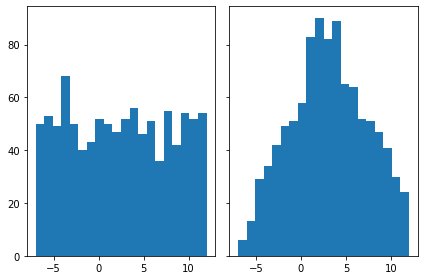

In [6]:
n_bins = 20
fig2, axs2 = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs2[0].hist(hint_uniform_samples, bins=n_bins);
axs2[1].hist(hint_normal_samples, bins=n_bins);

### Categorical Hyperparameters
By default those are sampled uniformly, but another distribution can be used.

In [7]:
hcat = ccs.CategoricalHyperparameter(name = 'hcat', values = ["hello", "val", 1.0, 2])
hcat_uniform_samples = hcat.samples(1000)
print(Counter(hcat_uniform_samples))
# Areas are normalized internally, so unormalized values can be used
roulette_distrib = ccs.RouletteDistribution(areas = [1.0, 2.0, 1.0, 0.5])
hcat_roulette_samples = hcat.samples(1000, distribution = roulette_distrib)
print(Counter(hcat_roulette_samples))

Counter({'val': 260, 1.0: 259, 2: 241, 'hello': 240})
Counter({'val': 452, 1.0: 226, 'hello': 211, 2: 111})


### Other hyperparameters
#### Ordinal Hyperparameters
same as Categorical but induces a total ordering, so elements can be compared:

In [8]:
hord = ccs.OrdinalHyperparameter(name = 'hord', values = ["hello", "val", 1.0, 2])
hcat_uniform_samples = hcat.samples(1000)
print(Counter(hcat_uniform_samples))
print(hord.compare(1.0, "val"))
print(hord.compare("val", 1.0))

Counter({1.0: 271, 'hello': 250, 'val': 242, 2: 237})
1
-1


#### Discrete Hyperparameters
This is an hybrid between an ordianl and a numerical numerical hyperparameter with ordered and definite values, but contrary to an ordinal, values can be compared directly.

In [9]:
hdis = ccs.DiscreteHyperparameter(name = 'hdis', values = [2, 3, 5.0, 7, 11.0])
hdis_uniform_samples = hdis.samples(1000)
print(Counter(hdis_uniform_samples))
# Areas are normalized internally, so unormalized values can be used
roulette_distrib2 = ccs.RouletteDistribution(areas = [1.0, 2.0, 1.0, 0.5, 0.2])
hdis_roulette_samples = hdis.samples(1000, distribution = roulette_distrib2)
print(Counter(hdis_roulette_samples))

Counter({3: 222, 7: 202, 2: 202, 5.0: 187, 11.0: 187})
Counter({3: 439, 2: 218, 5.0: 204, 7: 98, 11.0: 41})


## Configuration Space
A configuration space is an abstraction gathering several hyperparameters together so they can be sampled
### Definition
As usual the name is optional.

In [10]:
cs = ccs.ConfigurationSpace(name = "cs")

### Population
Hyperparameters can be added individually or grouped

In [11]:
cs.add_hyperparameter(hflt)
cs.add_hyperparameters([hint, hcat, hord, hdis])

### Sampling
By default sampling is done using hyperparameters default (uniform) distributions:

In [12]:
samples = cs.samples(1000)
print(samples[0].asdict())

{'hflt': 1.499096121173352, 'hint': -4, 'hcat': 'val', 'hord': 2, 'hdis': 3}


Counter({'hello': 259, 1.0: 250, 2: 247, 'val': 244})
Counter({2: 266, 'hello': 260, 1.0: 250, 'val': 224})
Counter({2: 204, 11.0: 203, 5.0: 199, 3: 197, 7: 197})


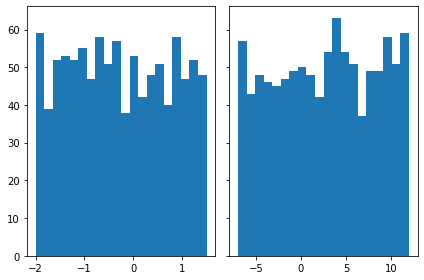

In [13]:
n_bins = 20
fig3, axs3 = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs3[0].hist([x.value('hflt') for x in samples], bins=n_bins);
axs3[1].hist([x.value('hint') for x in samples], bins=n_bins);
print(Counter([x.value('hcat') for x in samples]))
print(Counter([x.value('hord') for x in samples]))
print(Counter([x.value('hdis') for x in samples]))

Distributions can be replaced, and as multidimentional distributions (see `MultivariateDistribution`) are supported, the parameters they refer to must be a list:

Counter({'val': 254, 2: 252, 1.0: 247, 'hello': 247})
Counter({'val': 451, 1.0: 225, 'hello': 205, 2: 119})
Counter({3: 419, 5.0: 224, 2: 214, 7: 91, 11.0: 52})


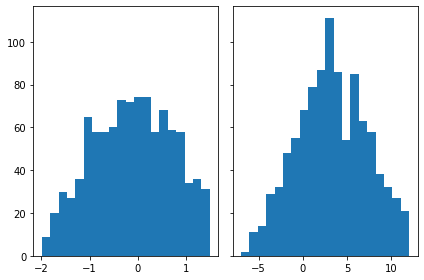

In [14]:
cs.set_distribution(fnrm_distrib, [hflt])
cs.set_distribution(inrm_distrib, [hint])
cs.set_distribution(roulette_distrib, [hord])
cs.set_distribution(roulette_distrib2, [hdis])
samples2 = cs.samples(1000)
n_bins = 20
fig4, axs4 = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs4[0].hist([x.value('hflt') for x in samples2], bins=n_bins);
axs4[1].hist([x.value('hint') for x in samples2], bins=n_bins);
print(Counter([x.value('hcat') for x in samples2]))
print(Counter([x.value('hord') for x in samples2]))
print(Counter([x.value('hdis') for x in samples2]))